In [1]:
import pandas as pd
import time
import matplotlib as plt
import datetime
import numpy as np
import gc
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
%matplotlib inline


Using TensorFlow backend.


# Data 

In [2]:
Data= pd.read_csv("Resampled_price.csv")

Data['time']=pd.to_datetime(Data['time'])
Data.set_index('time',inplace=True)

Data=Data.resample('1D').mean()
Data['mid']=(Data['bid']+Data['ask'])*0.5
Data.head(6)


,bid,ask,mid
time,,,
2014-01-01,2.102973,2.104427,2.103700
2014-01-02,2.102629,2.103076,2.102852
2014-01-03,2.097446,2.097847,2.097646
2014-01-04,2.092124,2.093106,2.092615
2014-01-05,2.092124,2.093106,2.092615
2014-01-06,2.095182,2.095528,2.095355


In [3]:
Data['bid']=Data['bid'].pct_change() 
Data['ask']=Data['ask'].pct_change() 
Data['mid']=Data['mid'].pct_change() 
#Data[Data.ask==0].shape[0]

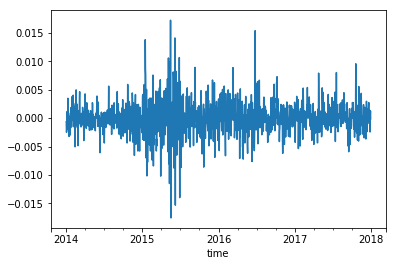

In [4]:
Data['ask'].plot()


# Statistics 


In [5]:
Data.ask.var()


7.30914348033037e-06

# Inputs and Outputs


In [6]:

def create_input(data,window_len_input=5,window_len_output=3):
    #Note-creates a list which later need to be transformed to np array
    
    inputs=[]
    for i in range(len(data) - window_len_input-window_len_output):
        temp_set = data[i:(i + window_len_input)].copy()
        inputs.append(temp_set)
    return inputs

def create_outputs(data,window_len_input=5,window_len_output=3):
     #Note-creates a list which later need to be transformed to np array
    outputs=[]
    for i in range(window_len_input,len(data)):
        time_set=data[i:(i + window_len_output)].copy()
        outputs.append(time_set)
    return outputs

def create_windows(data,window_len):
     #Note-creates a list which later need to be transformed to np array
    outputs=[]
    for i in range(len(data)-window_len):
        time_set=data[i:(i + window_len)].copy()
        outputs.append(time_set)
    return outputs






def to_array(data):
      
     #data: DataFrame
       #This function will convert list of inputs to a numpy array
     #Return: numpy array
      
   # x=[np.array(data[i]) for i in range (len(data))]
    x=[np.array(data[i]) for i in range (len(data))]

    return np.array(x)


In [8]:
Data['mid']=(Data['bid']+Data['ask'])*0.5
Data=Data[1:]
Data.head()

,bid,ask,mid
time,,,
2014-01-02,-0.000163,-0.000642,-0.000403
2014-01-03,-0.002465,-0.002486,-0.002476
2014-01-04,-0.002537,-0.002260,-0.002399
2014-01-05,0.000000,0.000000,0.000000
2014-01-06,0.001462,0.001157,0.001309


In [9]:
inputs=create_windows(Data.loc[:, Data.columns != 'mid'],120)
#outputs=create_outputs(Data.iloc[:20, 2:3])
outputs=create_windows(Data.loc[:, Data.columns != 'mid'],60)



In [10]:
print(inputs[0])

                 bid       ask
time                          
2014-01-02 -0.000163 -0.000642
2014-01-03 -0.002465 -0.002486
2014-01-04 -0.002537 -0.002260
2014-01-05  0.000000  0.000000
2014-01-06  0.001462  0.001157
2014-01-07 -0.001970 -0.001980
2014-01-08 -0.001766 -0.001767
2014-01-09 -0.001151 -0.001150
2014-01-10  0.003456  0.003481
2014-01-11  0.001092  0.001396
2014-01-12  0.000000  0.000000
2014-01-13  0.000365  0.000030
2014-01-14 -0.003066 -0.003073
2014-01-15 -0.002921 -0.002910
2014-01-16 -0.003215 -0.003223
2014-01-17 -0.000710 -0.000683
2014-01-18 -0.002040 -0.001706
2014-01-19  0.000000  0.000000
2014-01-20  0.000667  0.000341
2014-01-21 -0.002947 -0.002976
2014-01-22  0.000937  0.000922
2014-01-23 -0.001693 -0.001695
2014-01-24  0.000657  0.000698
2014-01-25  0.001519  0.001870
2014-01-26  0.000000  0.000000
2014-01-27  0.000536  0.000168
2014-01-28 -0.000218 -0.000222
2014-01-29 -0.000438 -0.000438
2014-01-30  0.003796  0.003779
2014-01-31  0.000219  0.000337
...     

In [11]:
print(outputs[120])

                 bid       ask
time                          
2014-05-02 -0.001565 -0.001379
2014-05-03 -0.000375  0.001078
2014-05-04  0.000000  0.000000
2014-05-05 -0.000375 -0.002019
2014-05-06 -0.001099 -0.001110
2014-05-07  0.002708  0.002704
2014-05-08  0.002394  0.002405
2014-05-09 -0.001792 -0.001704
2014-05-10 -0.000023  0.000648
2014-05-11  0.000000  0.000000
2014-05-12 -0.000421 -0.001187
2014-05-13 -0.001371 -0.001366
2014-05-14  0.000323  0.000315
2014-05-15 -0.001349 -0.001343
2014-05-16 -0.000048  0.000043
2014-05-17 -0.000425  0.000266
2014-05-18  0.000000  0.000000
2014-05-19 -0.000616 -0.001391
2014-05-20 -0.001787 -0.001801
2014-05-21 -0.002240 -0.002228
2014-05-22 -0.000189 -0.000188
2014-05-23  0.000288  0.000479
2014-05-24 -0.000466  0.000864
2014-05-25  0.000000  0.000000
2014-05-26  0.001529  0.000046
2014-05-27  0.000778  0.000741
2014-05-28  0.002149  0.002144
2014-05-29  0.003861  0.003873
2014-05-30  0.000547  0.000648
2014-05-31 -0.000249  0.000504
2014-06-

In [12]:
Inputs=to_array(inputs[:-60])
Outputs=to_array(outputs[120:])
#outputs=outputs.reshape((-1,3,1))
print(Inputs.shape,"\n",Outputs.shape)

(1278, 120, 2) 
 (1278, 60, 2)


In [13]:
Y=Outputs.mean(axis=2, dtype=None, out=None, keepdims=True)
print(Y.shape)
Y2=Y.reshape((Y.shape[0], -1))
Y2.shape

(1278, 60, 1)


(1278, 60)

# Train-Test split

In [14]:
def split_data(data, training_size=0.8):
    return data[:int(training_size*len(data))], data[int(training_size*len(data)):]

X_train,X_test=split_data(Inputs)
Y_train,Y_test=split_data(Y2)
# Y_train=Y_train.reshape((-1,3,1))
# Y_test=Y_test.reshape((-1,3,1))
# print(X_train.shape,"\n",Y_train[0].shape,"\n",Y_test.shape)


# def asdf(data):
#     for i in range(len(data)):
#         data[i].reshape[]

In [15]:
print(X_train.shape,'\n',Y_train.shape)


(1022, 120, 2) 
 (1022, 60)


# MODDEL
-Denoising might be good to be added.


In [16]:
neurons = 512                 
activation_function = 'tanh'  
loss = 'mse'                  
optimizer= 'adam'            
dropout = 0.10                
batch_size = 128              
epochs = 53                  
          


def build_model(inputs, outputs, neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  
  #inputs: input data as numpy array
  #output_size: number of predictions per input sample
  #neurons: number of neurons/ units in the LSTM layer
  #active_func: Activation function to be used in LSTM layers and Dense layer
  #dropout: dropout ration, default is 0.25
  #loss: loss function for calculating the gradient
  #optimizer: type of optimizer to backpropagate the gradient
  #This function will build 3 layered RNN model with LSTM cells with dripouts after each LSTM layer 
  #and finally a dense layer to produce the output using keras' sequential model.
  #Return: Keras sequential model and model summary
    output_size=outputs[0].shape[0]
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    model.summary()
    return model



In [17]:
# random seed for reproducibility
np.random.seed(2018)
model = build_model(X_train, Y_train, neurons=neurons)
#model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test), shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 512)          1054720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 512)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 512)          2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 512)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                30780     
__________

In [18]:
#X=inputs[:5]
#Y= np.ndarray(shape=(5,3), dtype=float, order='F')


In [19]:
#print(Y[0])


In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=10, shuffle=False)



Epoch 1/20
1022/1022 [==============================] - 164s 161ms/step - loss: 8.7727e-06 - mean_absolute_error: 0.0022
Epoch 2/20
1022/1022 [==============================] - 154s 151ms/step - loss: 7.5308e-06 - mean_absolute_error: 0.0020
Epoch 3/20
1022/1022 [==============================] - 150s 146ms/step - loss: 7.2210e-06 - mean_absolute_error: 0.0020
Epoch 4/20
1022/1022 [==============================] - 159s 156ms/step - loss: 7.1591e-06 - mean_absolute_error: 0.0020
Epoch 5/20
1022/1022 [==============================] - 155s 152ms/step - loss: 7.0608e-06 - mean_absolute_error: 0.0019
Epoch 6/20
 990/1022 [============================>.] - ETA: 4s - loss: 7.0817e-06 - mean_absolute_error: 0.0019

In [150]:
model.get_weights()


[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([-2.3464066e-09,  9.1116990e-09,  2.0842774e-09, ...,
         3.9120667e-09,  5.0424673e-09, -5.4070233e-09], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [na

In [144]:
Pred=model.predict(X_test[:1])


In [145]:
Pred[0]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)